### Loading dataset

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [50]:
df=pd.read_csv("C:/Users/Malinirani/Desktop/M.L/diabetes.csv")

In [51]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Split the data set to train and test sets

In [53]:
train_set = df.sample(frac=0.2, random_state=42)
test_set = df.drop(train_set.index)

In [54]:
print("Train Set (First 05 rows):")
print(train_set.head(5))
print("\nTest Set (First 05 rows):")
print(test_set.head(5))

Train Set (First 05 rows):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Outcome  
668                     0.430   43        0  
324                     0.148   21        0  
624                     0.158   21        0  
690                     0.856   34        0  
473                     0.210   50        0  

Test Set (First 05 rows):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
3        

In [55]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']

In [56]:
X = StandardScaler().fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [59]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [60]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [61]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

In [62]:
knn=KNeighborsClassifier()

In [63]:
knn.fit(X_train,y_train)

In [64]:
y_pred=knn.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [76]:
cm=confusion_matrix(y_pred,y_test)

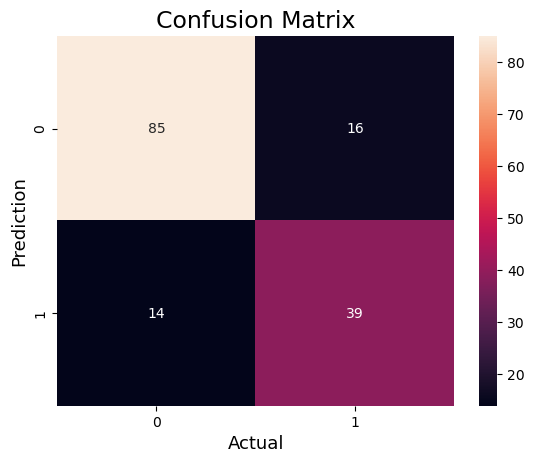

In [77]:
sns.heatmap(cm, 
            annot=True,
            fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()